# **DISEÑO DE UNA RED NEURONAL CONVOLUCIONAL**


> ## **CLASIFICACIÓN DE IMÁGENES**

> #### **BASE DE DATOS: FASHION MNIST**




#### ÁNGELES GARRIDO

***FASHION_MNIST*** es una base de datos compuesta por un conjunto de entrenamiento de 60.000 imágenes y un conjunto de test de 10.000 imágenes, asociadas a 10 clases diferentes de imágenes relacionadas con moda.   

**CPU**: Unidad Central de Procesamiento. Es el microprocesador que se encarga de procesar la infomración en los ordenadores

**GPU**: Unidad de Procesamiento Gráfico. Son los procesadores especializados en procesamiento de gráficos, vídeos y animaciones. Su principal uso es para mejorar el rendimiento de aplicaciones que requieren un gran procesamiento gráfico, como pueden ser los juegos, aplicaciones de animación 3D y modelado

**TPU**: Unidad de Procesamiento de Tensores. Es un procesador diseñado específicamente para el procesamiento de tareas de inteligencia artificial que requieren grandes cantidades de operaciones de multiplicación de matrices.



#### Importamos librerías más usadas como: NumPy, Pandas, MatPlotLib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#### Importamos las librerías necesarias para el diseño de modelos CNN

In [ ]:
# -- Librerías de Keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K

# -- Librerías de Tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Librería de la base de datos de imágenes MNIST
from keras.datasets import mnist

# Librería "display" para visualizacion de las imágenes pixeladas
from IPython.display import display


## Importamos el conjunto de imágenes llamado FASHION MNIST

#### Este conjunto de datos está ya preparado en conjuntos de imágenes de entrenamiento y validación. Además, todas las imágenes están ya identificadas con su etiqueta correspondiente


In [ ]:
# Importamos el conjunto de imágenes Fashion_MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Visualizamos el formato de los conjuntos de TRAINING y TEST
print("Formato del conjunto de entrenamiento x_train: {}".format(x_train.shape))
print("Formato del conjunto de etiquetas (entrenamiento) y_train: {}".format(y_train.shape))
print()
print("Formato del conjunto de test x_test: {}".format(x_test.shape))
print("Formato del conjunto de etiquetas (test) y_test: {}".format(y_test.shape))

Formato del conjunto de entrenamiento x_train: (60000, 28, 28)
Formato del conjunto de etiquetas (entrenamiento) y_train: (60000,)

Formato del conjunto de test x_test: (10000, 28, 28)
Formato del conjunto de etiquetas (test) y_test: (10000,)


## Definimos las 10 clases de etiquetas que hay en el dataset

**CLASES**

0 - 'T-shirt/top'

1 - 'Trouser'

2 - 'Pullover'

3 - 'Dress'

4 - 'Coat'

5 - 'Sandal'

6 - 'Shirt'

7 - 'Sneaker'

8 - 'Bag'

9 - 'Ankle boot'

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualización de las imágenes



### Visualizamos la primera imagen pixelada 28 x 28

In [ ]:
# Seleccionamos la primera imagen del conjunto (primer dígito)
single = x_train[0]
print("Formato de la imagen: {}".format(single.shape))

Formato de la imagen: (28, 28)


In [ ]:
# Representamos la imagen pixelada de 28 x 28 píxeles como mapa de bits
display(pd.DataFrame(single.reshape(28,28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


#### Visualizamos la primera imagen y su clase

##### *%matplotlib inline* es una función de iPython. La salida de los comandos de trazado se muestra en línea dentro de las interfaces como el cuaderno Jupyter, directamente debajo de la celda de código que lo produjo.


* #### En color: por defecto
* #### Escala de grises: añadimos el comando "cmap='gray'"


La etiqueta es: Ankle boot
La imagen (0): representa el dígito '9'


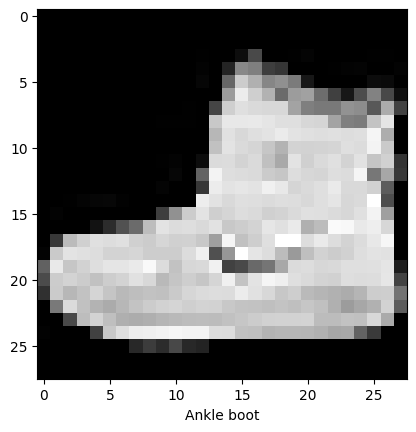

In [ ]:
# Visualización como imagen
%matplotlib inline

# Seleccionamos un dígito (posición de una imagen)
digit = 0 # Cambiar número para elegir otro dígito
a = x_train[digit]

# Visualización en escala de grises
plt.imshow(a, cmap='gray', interpolation='nearest')
plt.xlabel(class_names[y_train[digit]])
print('La etiqueta es:', class_names[y_train[digit]])
print("La imagen ({}): representa el dígito '{}'".format(digit,y_train[digit]))


La etiqueta es: Ankle boot
La imagen (0): representa el dígito '9'


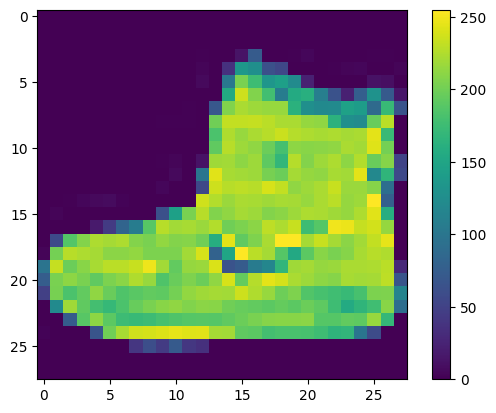

In [ ]:
# Visualización en color
plt.imshow(a, interpolation='nearest')
plt.colorbar()
print('La etiqueta es:', class_names[y_train[digit]])
print("La imagen ({}): representa el dígito '{}'".format(digit,y_train[digit]))


## Representamos las primeras 100 imágenes de ENTRENAMIENTO

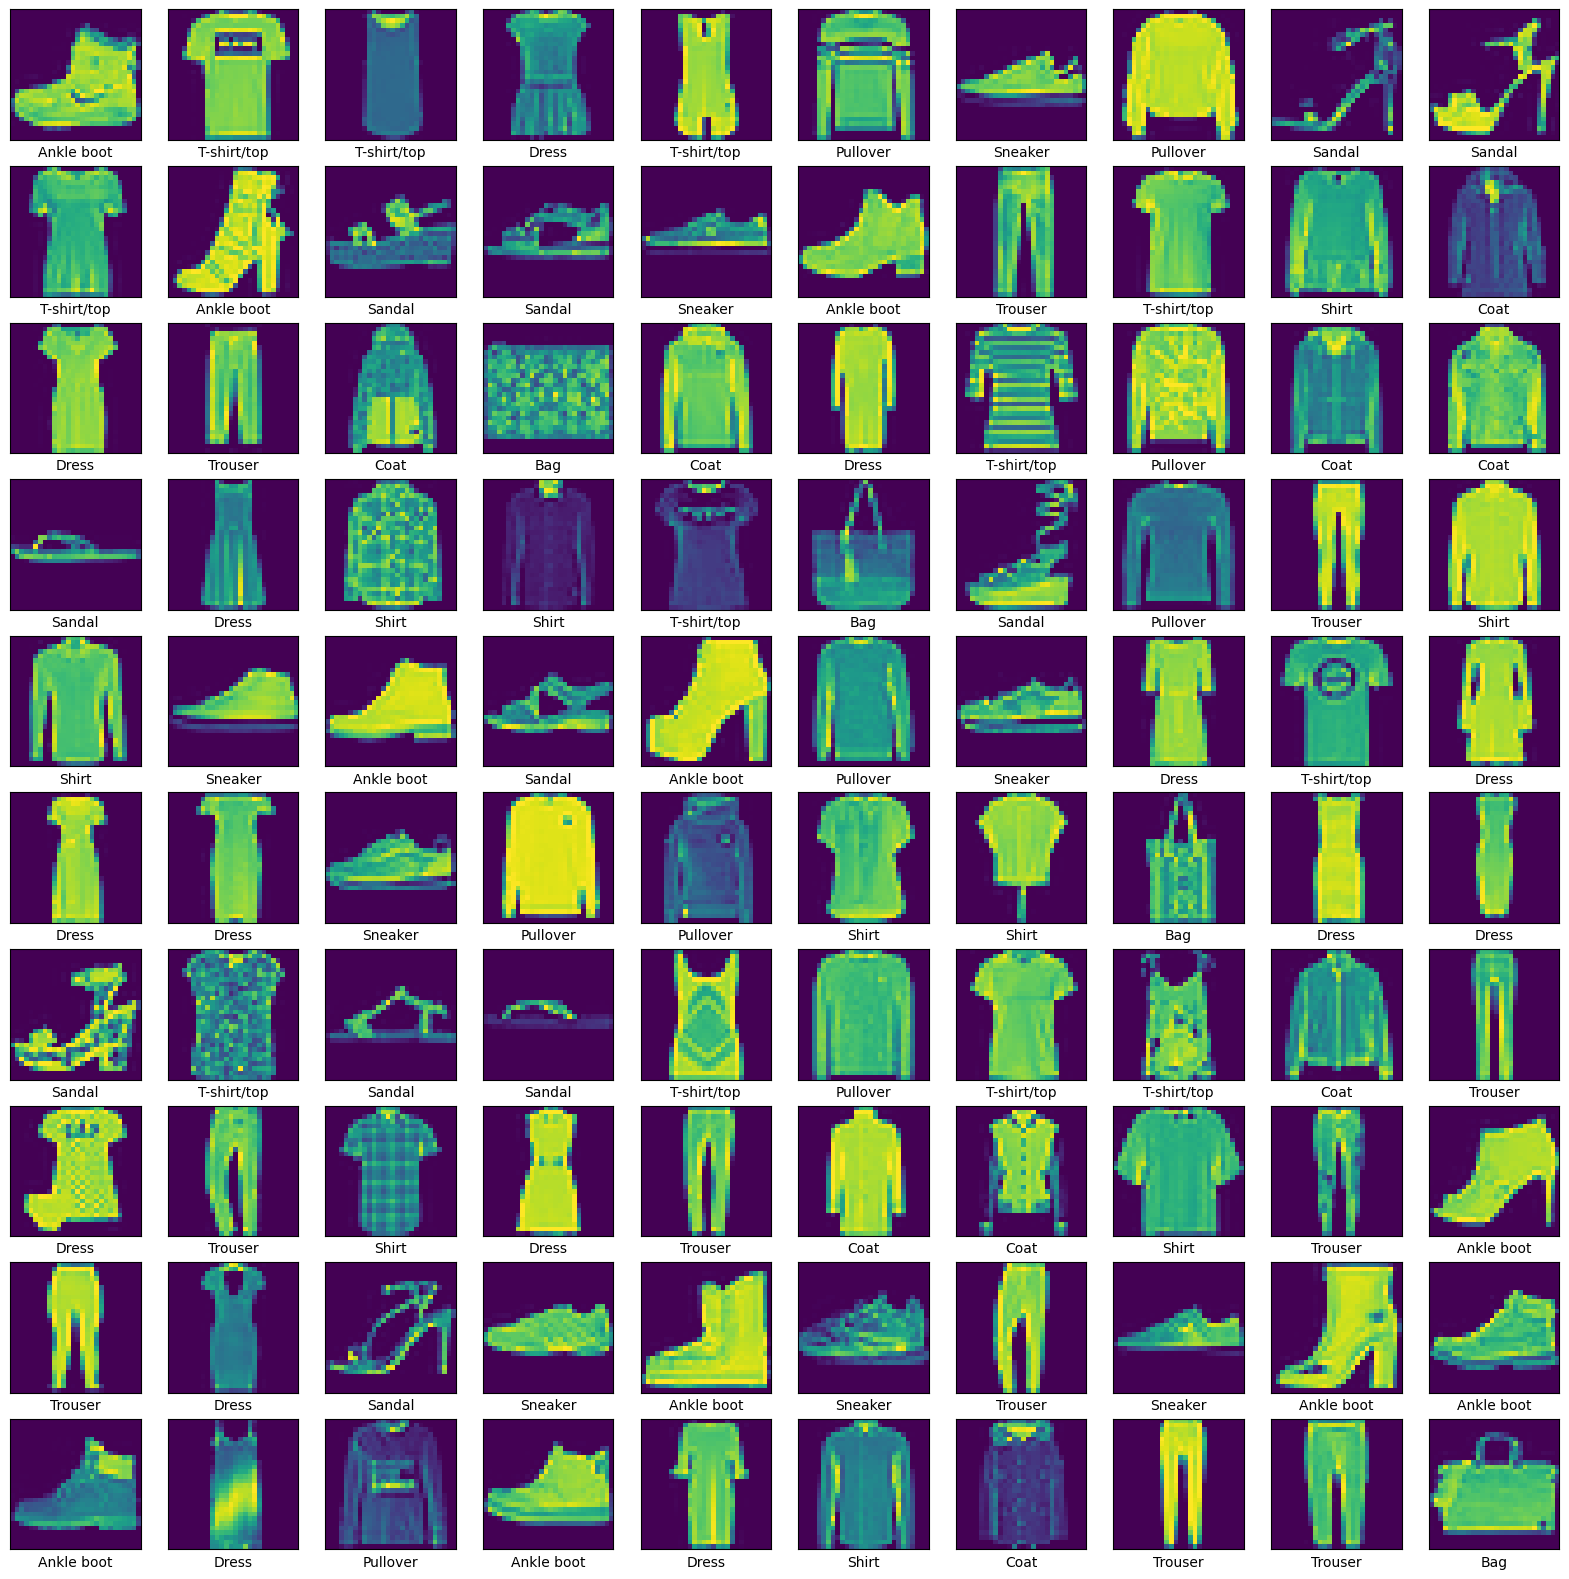

In [ ]:
# Visualizamos las primeras 100 imágenes en 'color'
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Procesamiento de los datos

#### Comprobamos nuevamente el formato de "x_train" y "x_test"

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Definición de parámetros

In [ ]:
# Dimensiones de la imagen de entrada
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

# Número de etiquetas diferentes
num_classes = np.unique(y_train).shape[0]


#### Cambiamos el formato de las imágenes de los conjuntos de entrenamiento y test

##### Las matrices de entrada tienen que tener un formato específico para entrar en el modelo

## **ATENCIÓN**

#### Hacemos una COPIA de los conjuntos de entrenamiento y test antes de cambiarles el formato.

In [ ]:
x_train_copy = x_train
x_test_copy  = x_test

y_train_copy = y_train
y_test_copy  = y_test

In [ ]:
# Formato de los canales de la imagen

# formato de los canales de colores: primera posición
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
# en otro caso
# formato de los canales de colores: ultima posición
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

##### Comprobamos el nuevo formato de "x_train" y "x_test"

In [ ]:
print("Conjunto de Training: {}".format(x_train.shape[0]), 'imágenes')
print(x_train.shape)

print()
print("Conjunto de TEST: {}".format(x_test.shape[0]), 'imágenes')
print(x_test.shape)

Conjunto de Training: 60000 imágenes
(60000, 28, 28, 1)

Conjunto de TEST: 10000 imágenes
(10000, 28, 28, 1)


In [ ]:
# Píxeles de la fila 10 de la primera imagen
print(x_train[0][10])

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [193]
 [228]
 [218]
 [213]
 [198]
 [180]
 [212]
 [210]
 [211]
 [213]
 [223]
 [220]
 [243]
 [202]
 [  0]]


#### Damos formato a los píxeles de las imágenes de coma flotante de simple precisión

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Normalizamos los píxeles entre [0,1] para que no tengan unos más valor que otros por tener simplemente un número más alto

In [ ]:
x_train /= 255
x_test /= 255

#### Visualizamos nuevamente los píxeles de la fila 10 de la primera imagen

In [ ]:
print(x_train[0][10])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.75686276]
 [0.89411765]
 [0.85490197]
 [0.8352941 ]
 [0.7764706 ]
 [0.7058824 ]
 [0.83137256]
 [0.8235294 ]
 [0.827451  ]
 [0.8352941 ]
 [0.8745098 ]
 [0.8627451 ]
 [0.9529412 ]
 [0.7921569 ]
 [0.        ]]


#### Convierte los vectores de clase en matrices de clases binarias

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Etiqueta de la primera imagen
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Diseñamos el modelo **CNN**
#### Construir la red neuronal convolucional requiere configurar las capas del modelo y luego compilar el modelo.

In [ ]:
# Modelo para CLASIFICACIÓN DE IMÁGENES

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))      # input_shape = (28, 28, 1)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))


#### Visualizamos la ARQUITECTURA DE LA RED CNN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

#### Compilamos la **CNN** que hemos diseñado

* #### Optimizador: Adam
* #### Función de pérdida: sparse categorical crossentropy
* #### Métrica: precisión

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#### Entrenamos el modelo **CNN** con:

* #### Conjunto de entrenamiento de 50.000 imágenes
* #### Entrenamos con 100 épocas

#### **ATENCIÓN**:
#### Sin entorno GPU esta celda tarda más de unos 2 minutos y medio por época

#### En entorno GPU esta celda tarda unos 4 segundos por época

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
start_time = time.time()

history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=2,
                   validation_data = (x_test, y_test)
                 )
end_time = time.time()

Epoch 1/10
938/938 - 14s - loss: 0.4724 - accuracy: 0.8278 - val_loss: 0.3287 - val_accuracy: 0.8789 - 14s/epoch - 15ms/step
Epoch 2/10
938/938 - 5s - loss: 0.2908 - accuracy: 0.8933 - val_loss: 0.2851 - val_accuracy: 0.8938 - 5s/epoch - 6ms/step
Epoch 3/10
938/938 - 6s - loss: 0.2449 - accuracy: 0.9099 - val_loss: 0.2475 - val_accuracy: 0.9093 - 6s/epoch - 6ms/step
Epoch 4/10
938/938 - 5s - loss: 0.2121 - accuracy: 0.9205 - val_loss: 0.2450 - val_accuracy: 0.9138 - 5s/epoch - 6ms/step
Epoch 5/10
938/938 - 5s - loss: 0.1851 - accuracy: 0.9313 - val_loss: 0.2572 - val_accuracy: 0.9128 - 5s/epoch - 6ms/step
Epoch 6/10
938/938 - 6s - loss: 0.1663 - accuracy: 0.9379 - val_loss: 0.2250 - val_accuracy: 0.9241 - 6s/epoch - 6ms/step
Epoch 7/10
938/938 - 5s - loss: 0.1467 - accuracy: 0.9448 - val_loss: 0.2418 - val_accuracy: 0.9195 - 5s/epoch - 5ms/step
Epoch 8/10
938/938 - 5s - loss: 0.1325 - accuracy: 0.9509 - val_loss: 0.2251 - val_accuracy: 0.9266 - 5s/epoch - 6ms/step
Epoch 9/10
938/938 - 

In [ ]:
# Tiempo de entrenamiento
elapsed_time = end_time - start_time
print('Tiempo estimado de entrenamiento (seg.):', np.around(elapsed_time))
print('Tiempo estimado de entrenamiento (min.):', np.around(elapsed_time/60))

Tiempo estimado de entrenamiento (seg.): 64.0
Tiempo estimado de entrenamiento (min.): 1.0


RESUMEN - TIEMPOS DE EJECUCIONES


*   10 épocas (GPU): - Tiempo estimado de entrenamiento: 1 min - accuracy: 0,92
*  100 épocas (GPU): - Tiempo estimado de entrenamiento: 7 min - accuracy: 0,93



## Representamos la precisión y la pérdida del modelo por época

### Para los conjuntos de entrenamiento y validación

<Figure size 640x480 with 0 Axes>

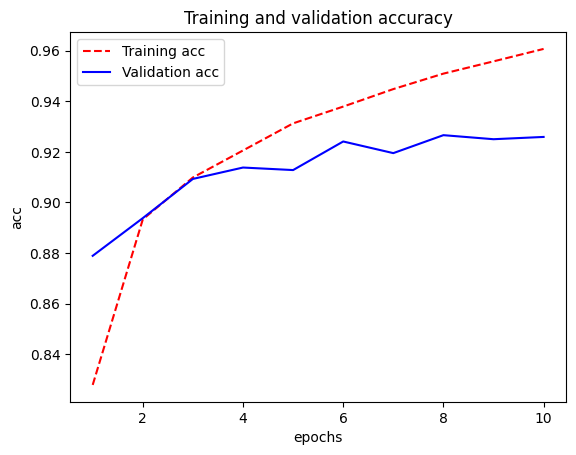

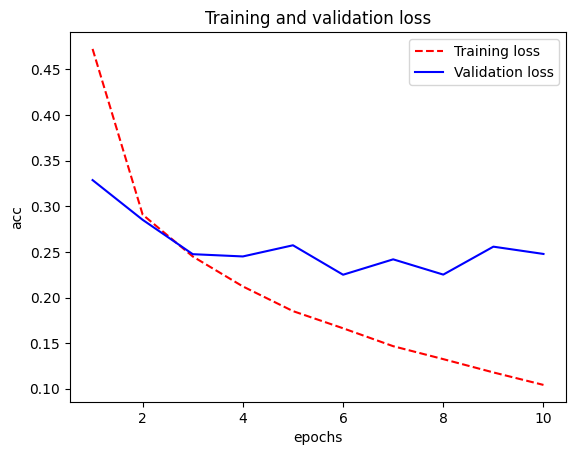

<Figure size 640x480 with 0 Axes>

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[         'loss' ]
val_loss = history.history[     'val_loss' ]

# Vector con el número de épocas

epochs   = range(1,len(acc)+1,1)


# REPRESENTACIÓN GRÁFICA

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--', label='Training loss'  )
plt.plot ( epochs, val_loss , 'b' , label='Validation loss' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

## Evaluamos la **CNN** en el conjunto de TEST

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

# Visualizamos la pérdida y la precisión
print('\nTest loss: {}'.format(test_loss))
print('\nTest accuracy: {}'.format(test_acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.9259

Test loss: 0.24774213135242462

Test accuracy: 0.9258999824523926


#### Predecimos el conjunto de TEST con el modelo que hemos diseñado

##### np.newaxis simplemente aumenta una dimensión a la matriz de la imagen

In [ ]:
#pred = model.predict(x_test[np.newaxis,1])

predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Visualizamos para la primera imagen:


*   Su clase en el vector de clases binario
*   La clase en la predicción





In [ ]:
print("El vector de clase de la primera imagen es : {}".format(y_test[0]))
print()
print("La posición de la clase es : {}".format(np.argmax(y_test[0])))
print()
print("En la PREDICCIÓN, El vector de clase de la primera imagen es : {}".format(predictions[0].round()))
print()
print("En la PREDICCIÓN, la posición de la clase es : {}".format(np.argmax(predictions[0])))

El vector de clase de la primera imagen es : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

La posición de la clase es : 9

En la PREDICCIÓN, El vector de clase de la primera imagen es : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

En la PREDICCIÓN, la posición de la clase es : 9


Definimos unos arrays para los aciertos y los fallos realizados por el modelo

In [ ]:
aciertos = []
imagenes_aciertos = []

In [ ]:
fallos = []
imagenes_fallos = []

In [ ]:
#Recorremos todas las imágenes del conjunto de predicciones y vemos si hemos acertado o por el contrario se falla

for i in range(len(predictions)):
  if np.argmax(predictions[i]) == np.argmax(y_test[i]):
    imagenes_aciertos.append(i)                           # posición de la imagen
    aciertos.append(np.argmax(y_test[i]))                 # clase de la imagen
  else:
    imagenes_fallos.append(i)                             # posición de la imagen
    fallos.append(np.argmax(y_test[i]))                   # clase de la imagen


Contamos los FALLOS por CLASE

In [ ]:
# Número de imágenes que ha fallado
print("Número de imágenes que ha fallado ", len(fallos))

Número de imágenes que ha fallado  741


In [ ]:
[[x,fallos.count(x)] for x in set(fallos)]

[[0, 105],
 [1, 23],
 [2, 119],
 [3, 39],
 [4, 135],
 [5, 13],
 [6, 246],
 [7, 22],
 [8, 10],
 [9, 29]]

CLASES

*   0 'T-shirt/top'
*   1 - 'Trouser'
*   2 - 'Pullover'
*   3 - 'Dress'
*   4 - 'Coat'
*   5 - 'Sandal'
*   6 - 'Shirt'
*   7 - 'Sneaker'
*   8 - 'Bag'
*  9 - 'Ankle boot'

#### FALLOS COMETIDOS PARA UNA EJECUCIÓN DE 2 ÉPOCAS


* [0, 230],
* [1, 48],
* [2, 278],
* [3, 184],
* [4, 172],
* [5, 68],
* [6, 482],
* [7, 20],
* [8, 32],
* [9, 92]

#### FALLOS COMETIDOS PARA OTRA EJECUCIÓN DE 2 ÉPOCAS

* [0, 140],
* [1, 33],
* [2, 183],
* [3, 103],
* [4, 94],
* [5, 18],
* [6, 378],
* [7, 64],
* [8, 19],
* [9, 29]

#### FALLOS COMETIDOS PARA OTRA NUEVA EJECUCIÓN DE 2 ÉPOCAS


* [0, 123],
* [1, 33],
* [2, 180],
* [3, 84],
* [4, 167],
* [5, 21],
* [6, 319],
* [7, 18],
* [8, 22],
* [9, 70]

#### FALLOS COMETIDOS PARA OTRA NUEVA EJECUCIÓN DE 10 ÉPOCAS (64 batch)

* [0, 114],
* [1, 13],
* [2, 114],
* [3, 87],
* [4, 84],
* [5, 13],
* [6, 224],
* [7, 14],
* [8, 16],
* [9, 34]

#### FALLOS COMETIDOS PARA OTRA NUEVA EJECUCIÓN DE 100 ÉPOCAS (128 batch)

* [0, 145],
* [1, 15],
* [2, 102],
* [3, 55],
* [4, 81],
* [5, 14],
* [6, 203],
* [7, 24],
* [8, 14],
* [9, 33]]

# PRIMERA IMAGEN ACERTADA Y PRIMERA IMAGEN FALLADA

In [ ]:
print("La primera imagen que acierta",imagenes_aciertos[0])
print("La primera imagen que falla",imagenes_fallos[0])
print()
print("La imagen de la posición",imagenes_fallos[0])
print("La etiqueta es: ",np.argmax(y_test[imagenes_fallos[0]]))
print("La prediccion es: ",np.argmax(predictions[imagenes_fallos[0]]))
print()
print("La etiqueta es: ",class_names[np.argmax(y_test[imagenes_fallos[0]])])
print("La prediccion es: ",class_names[np.argmax(predictions[imagenes_fallos[0]])])

La primera imagen que acierta 0
La primera imagen que falla 17

La imagen de la posición 17
La etiqueta es:  4
La prediccion es:  2

La etiqueta es:  Coat
La prediccion es:  Pullover


PRIMERA IMAGEN PREDICHA CORRECTAMENTE

La etiqueta es:  Ankle boot
La prediccion es:  Ankle boot



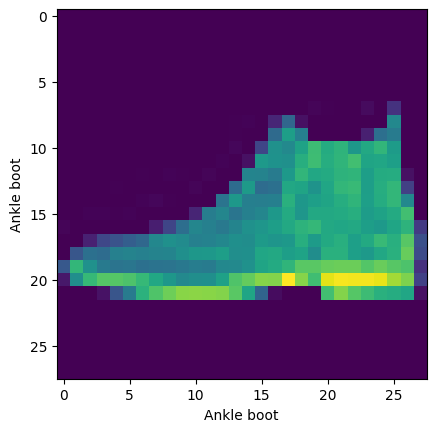

In [ ]:
# PRIMER ACIERTO
print("La etiqueta es: ",class_names[np.argmax(y_test[imagenes_aciertos[0]])])
print("La prediccion es: ",class_names[np.argmax(predictions[imagenes_aciertos[0]])])
print()

img = (x_test[imagenes_aciertos[0]]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.xlabel(class_names[y_test_copy[imagenes_aciertos[0]]])
plt.ylabel(class_names[np.argmax(predictions[imagenes_aciertos[0]])])
plt.show()

PRIMERA IMAGEN NO PREDICHA CORRECTAMENTE

La etiqueta es:  Coat
La prediccion es:  Pullover



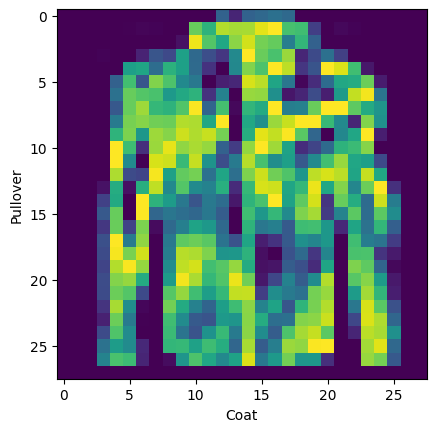

In [ ]:
# PRIMER FALLO
print("La etiqueta es: ",class_names[np.argmax(y_test[imagenes_fallos[0]])])
print("La prediccion es: ",class_names[np.argmax(predictions[imagenes_fallos[0]])])
print()

img = (x_test[imagenes_fallos[0]]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.xlabel(class_names[y_test_copy[imagenes_fallos[0]]])
plt.ylabel(class_names[np.argmax(predictions[imagenes_fallos[0]])])
plt.show()

# REPRESENTAMOS LAS IMÁGENES QUE **NO SE PREDICEN** CORRECTAMENTE

#### 100 PRIMERAS IMÁGENES **NO ACERTADAS**

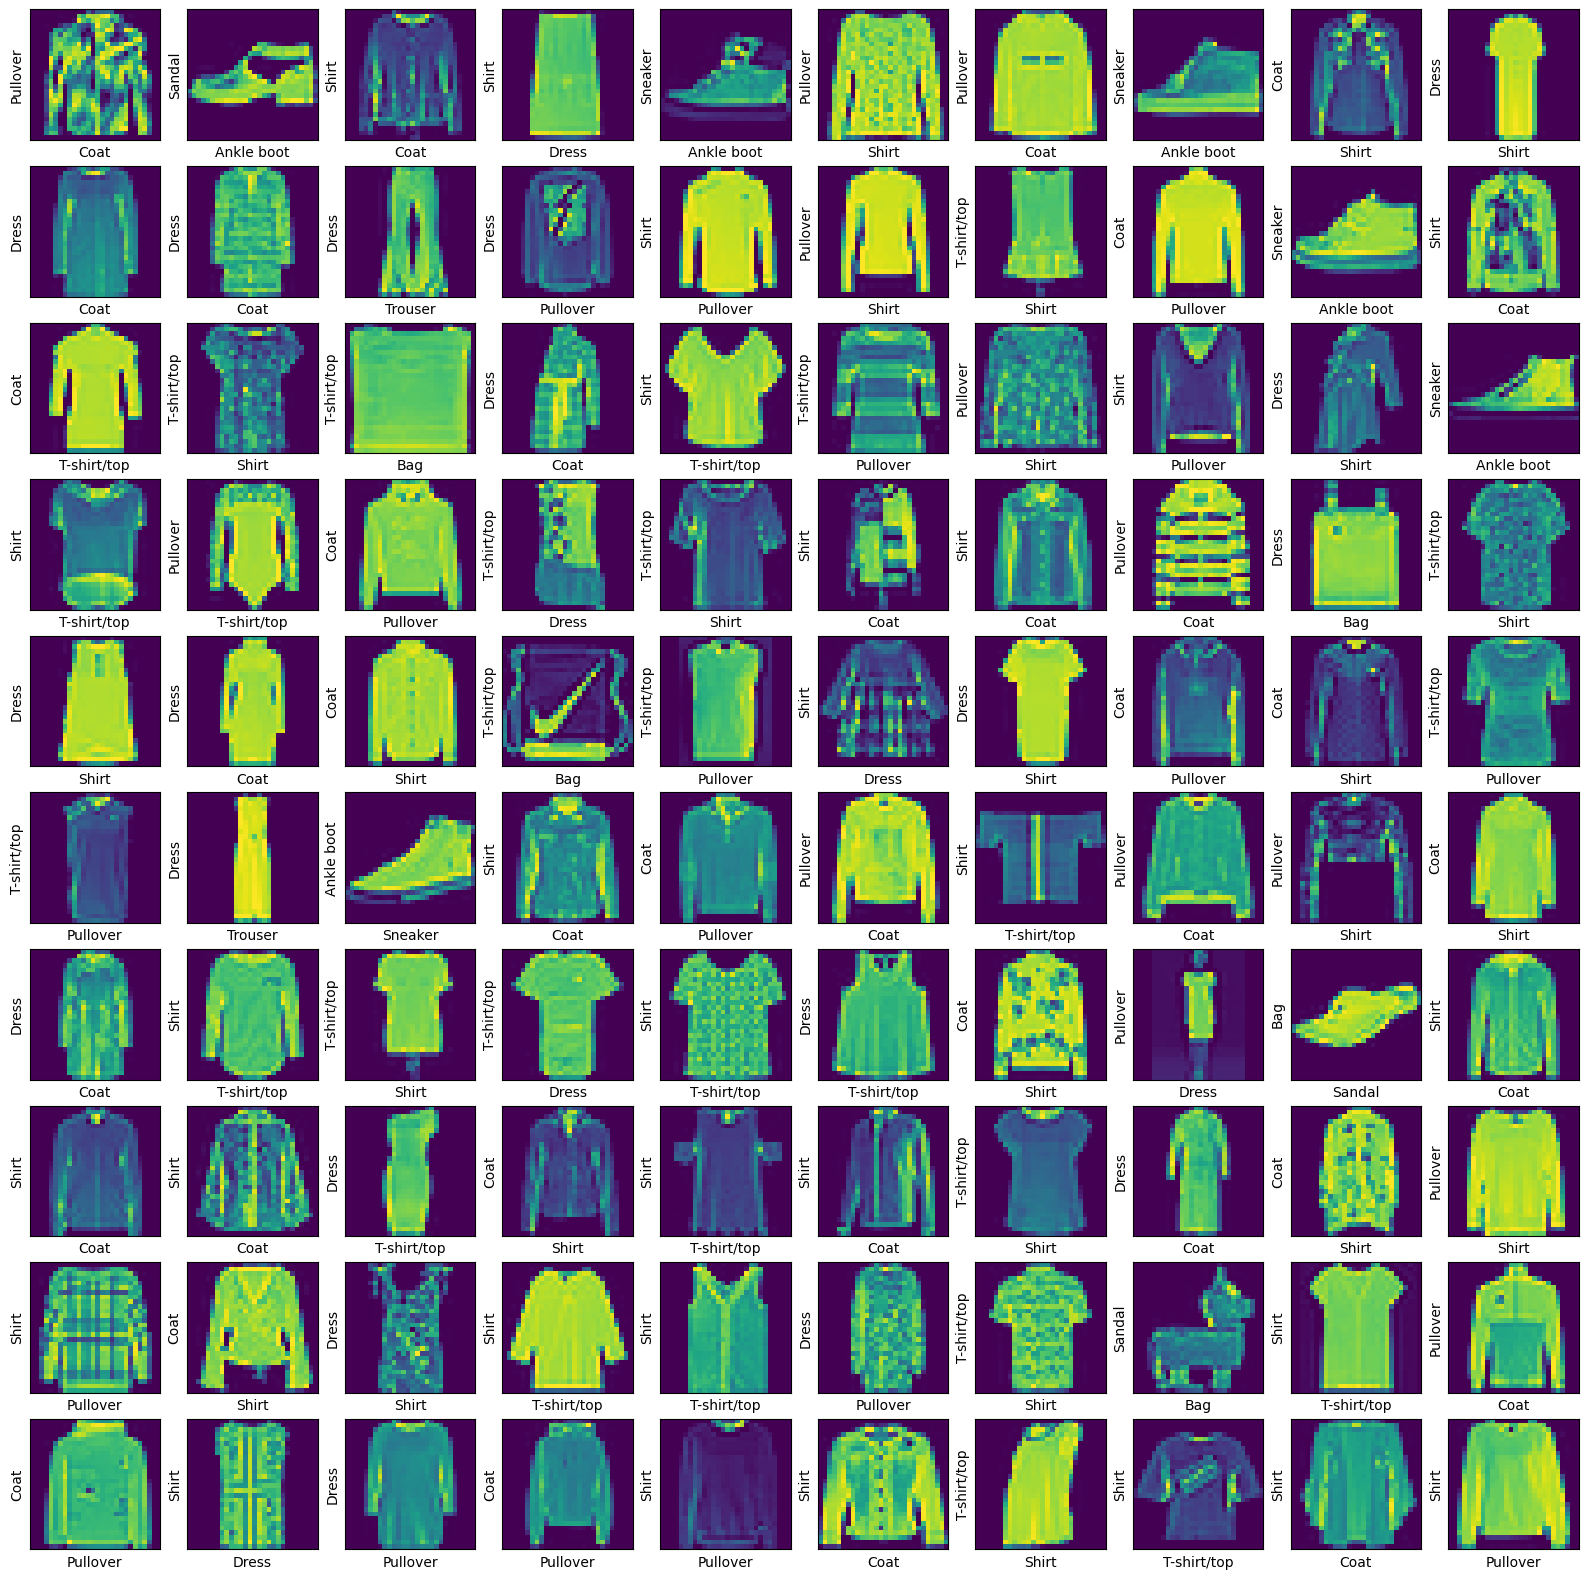

In [ ]:
# Visualizamos las primeras 100 imágenes NO ACERTADAS en 'color'

plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_copy[imagenes_fallos[i]])
    plt.xlabel(class_names[y_test_copy[imagenes_fallos[i]]])              # ETIQUETA REAL
    plt.ylabel(class_names[np.argmax(predictions[imagenes_fallos[i]])])   # PREDICCIÓN
plt.show()